In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('./revision-data/csvs/species_height_nitesh.csv')

In [3]:
file = file.dropna(subset=['Elevation_dem', 'species_na'])

In [4]:
file['Elevation_dem'] = pd.to_numeric(file['Elevation_dem'], errors='coerce')

In [5]:
file = file[file['Elevation_dem'].notna()]

In [18]:
for specie in file['species_na'].unique() :
    print(specie)
    print(file[file['species_na']==specie]['Elevation_dem'].describe())
    print("------------------------------------------------------")

Aesculus indica
count    4285.000000
mean     2206.652275
std       250.593289
min       429.000000
25%      2053.000000
50%      2201.000000
75%      2368.000000
max      2823.000000
Name: Elevation_dem, dtype: float64
------------------------------------------------------
Buchanania lanzan
count    3363.000000
mean      153.623848
std       104.407089
min        46.000000
25%        74.000000
50%        82.000000
75%       260.000000
max       671.000000
Name: Elevation_dem, dtype: float64
------------------------------------------------------
Cedrus deodara
count    21201.000000
mean      2074.209094
std        358.835734
min        513.000000
25%       1860.000000
50%       2109.000000
75%       2337.000000
max       3193.000000
Name: Elevation_dem, dtype: float64
------------------------------------------------------
Eucalyptus globulus
count    8443.000000
mean      640.121165
std       317.303704
min       300.000000
25%       454.000000
50%       495.000000
75%       683.000000

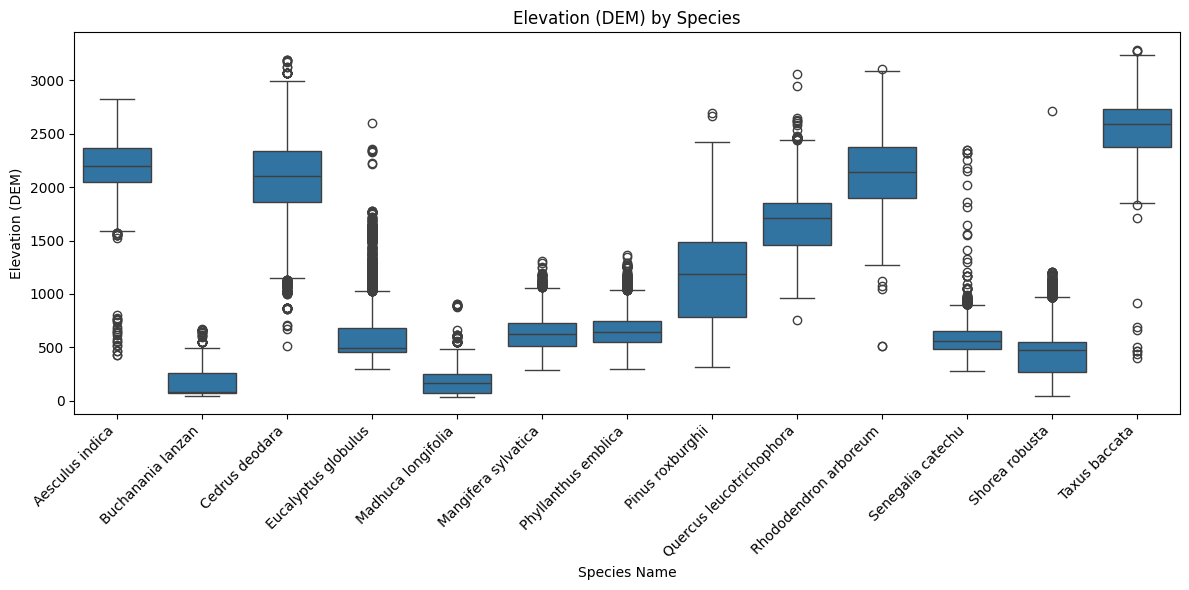

In [7]:
plt.figure(figsize=(12, 6))

# Boxplot: great for showing distribution
sns.boxplot(data=file, x='species_na', y='Elevation_dem')
plt.xticks(rotation=45, ha='right')
plt.title('Elevation (DEM) by Species')
plt.xlabel('Species Name')
plt.ylabel('Elevation (DEM)')
plt.tight_layout()
plt.show()

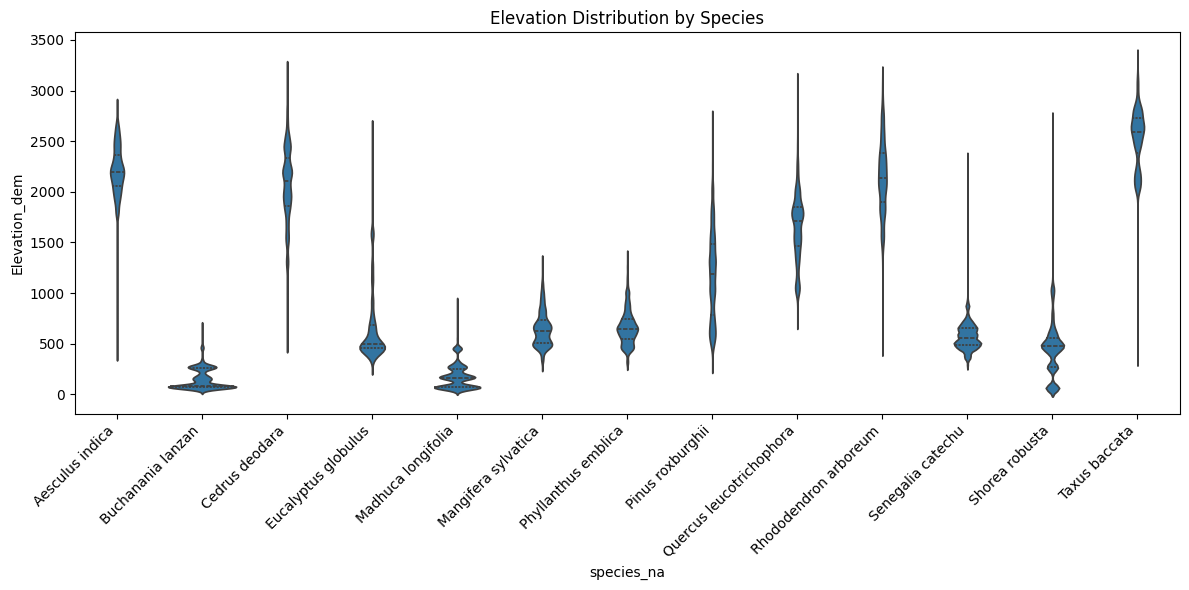

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=file, x='species_na', y='Elevation_dem', inner='quartile')
plt.xticks(rotation=45, ha='right')
plt.title('Elevation Distribution by Species')
plt.tight_layout()
plt.show()


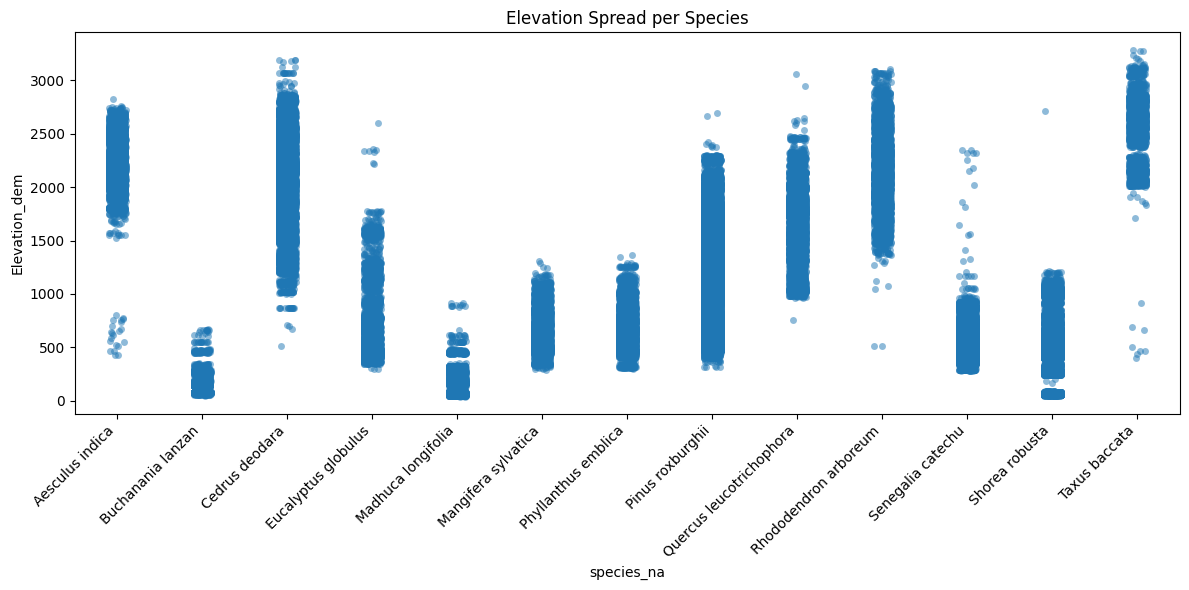

In [9]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=file, x='species_na', y='Elevation_dem', jitter=True, alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Elevation Spread per Species')
plt.tight_layout()
plt.show()


In [20]:
file['species_na'].unique()

array(['Aesculus indica', 'Buchanania lanzan', 'Cedrus deodara',
       'Eucalyptus globulus', 'Madhuca longifolia', 'Mangifera sylvatica',
       'Phyllanthus emblica', 'Pinus roxburghii',
       'Quercus leucotrichophora', 'Rhododendron arboreum',
       'Senegalia catechu', 'Shorea robusta', 'Taxus baccata'],
      dtype=object)

In [31]:
file[file['species_na']=='Buchanania lanzan']['Elevation_dem'].to_csv('temp_bl_elevation.csv',index=False)

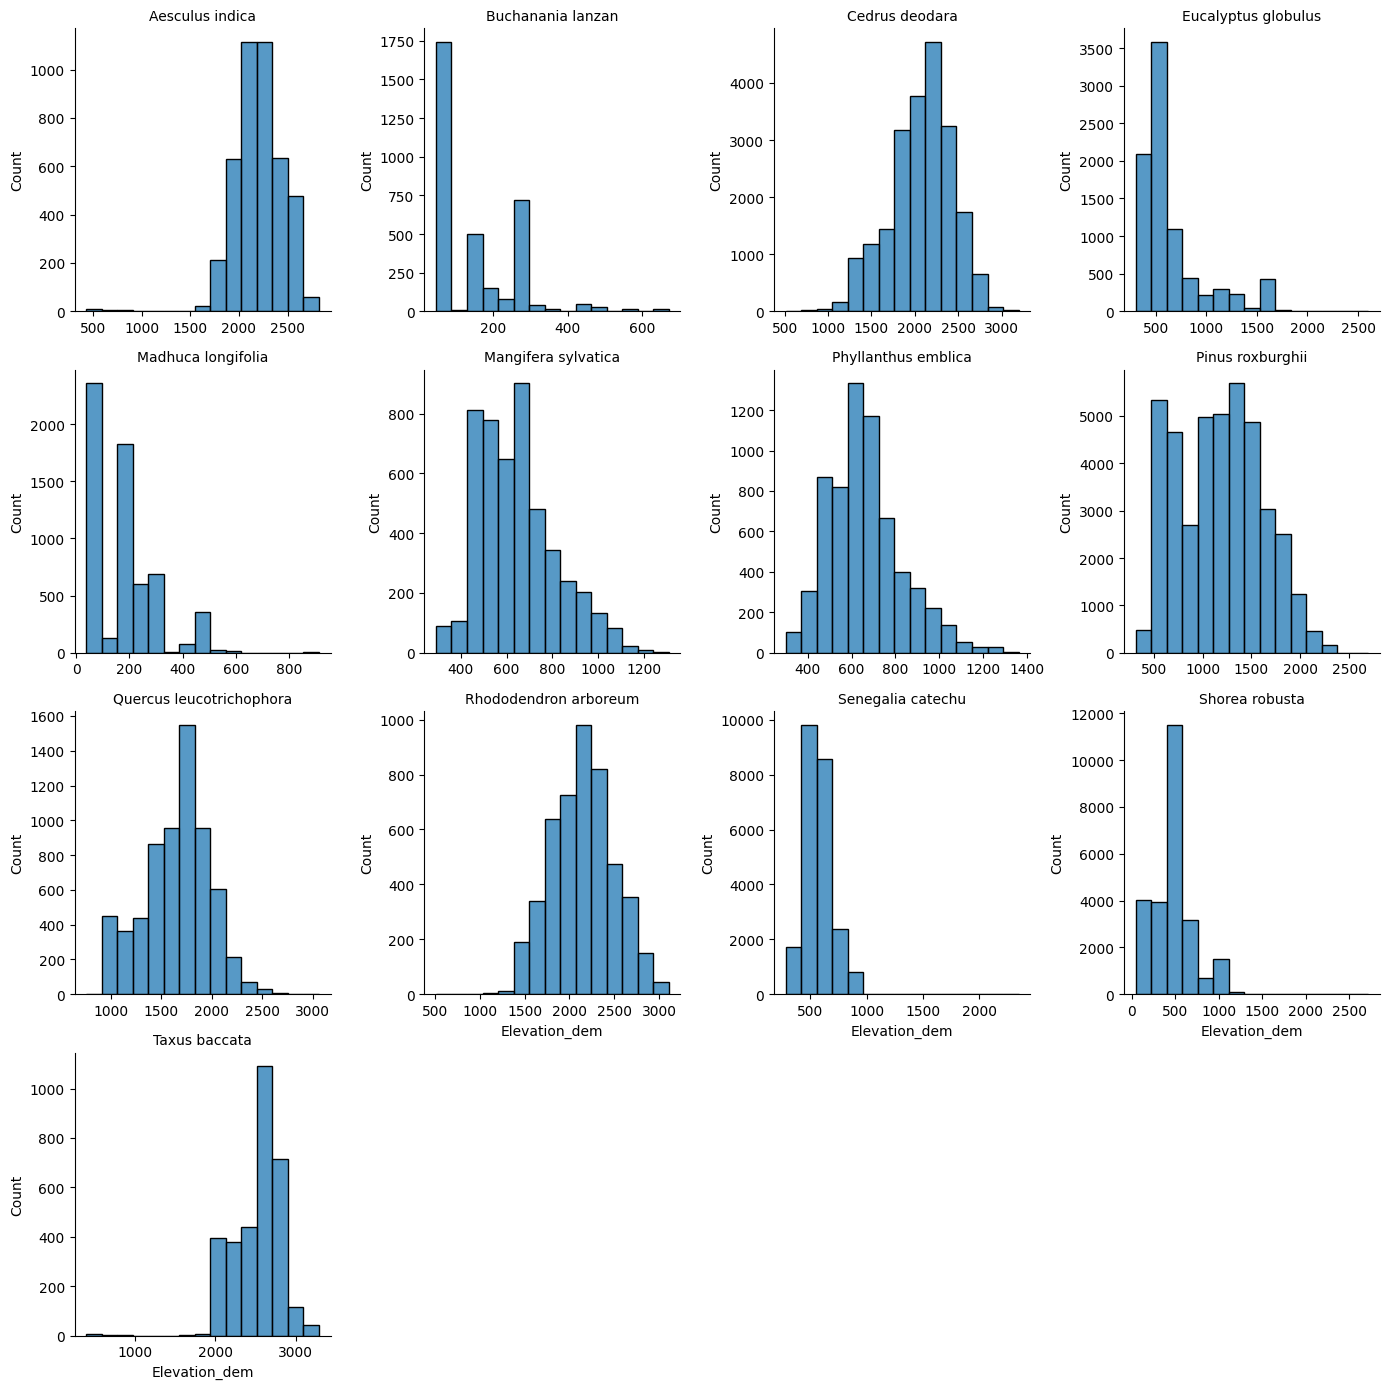

In [10]:
g = sns.FacetGrid(file, col='species_na', col_wrap=4, height=3.5, sharex=False, sharey=False)
g.map(sns.histplot, 'Elevation_dem', bins=15)
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()


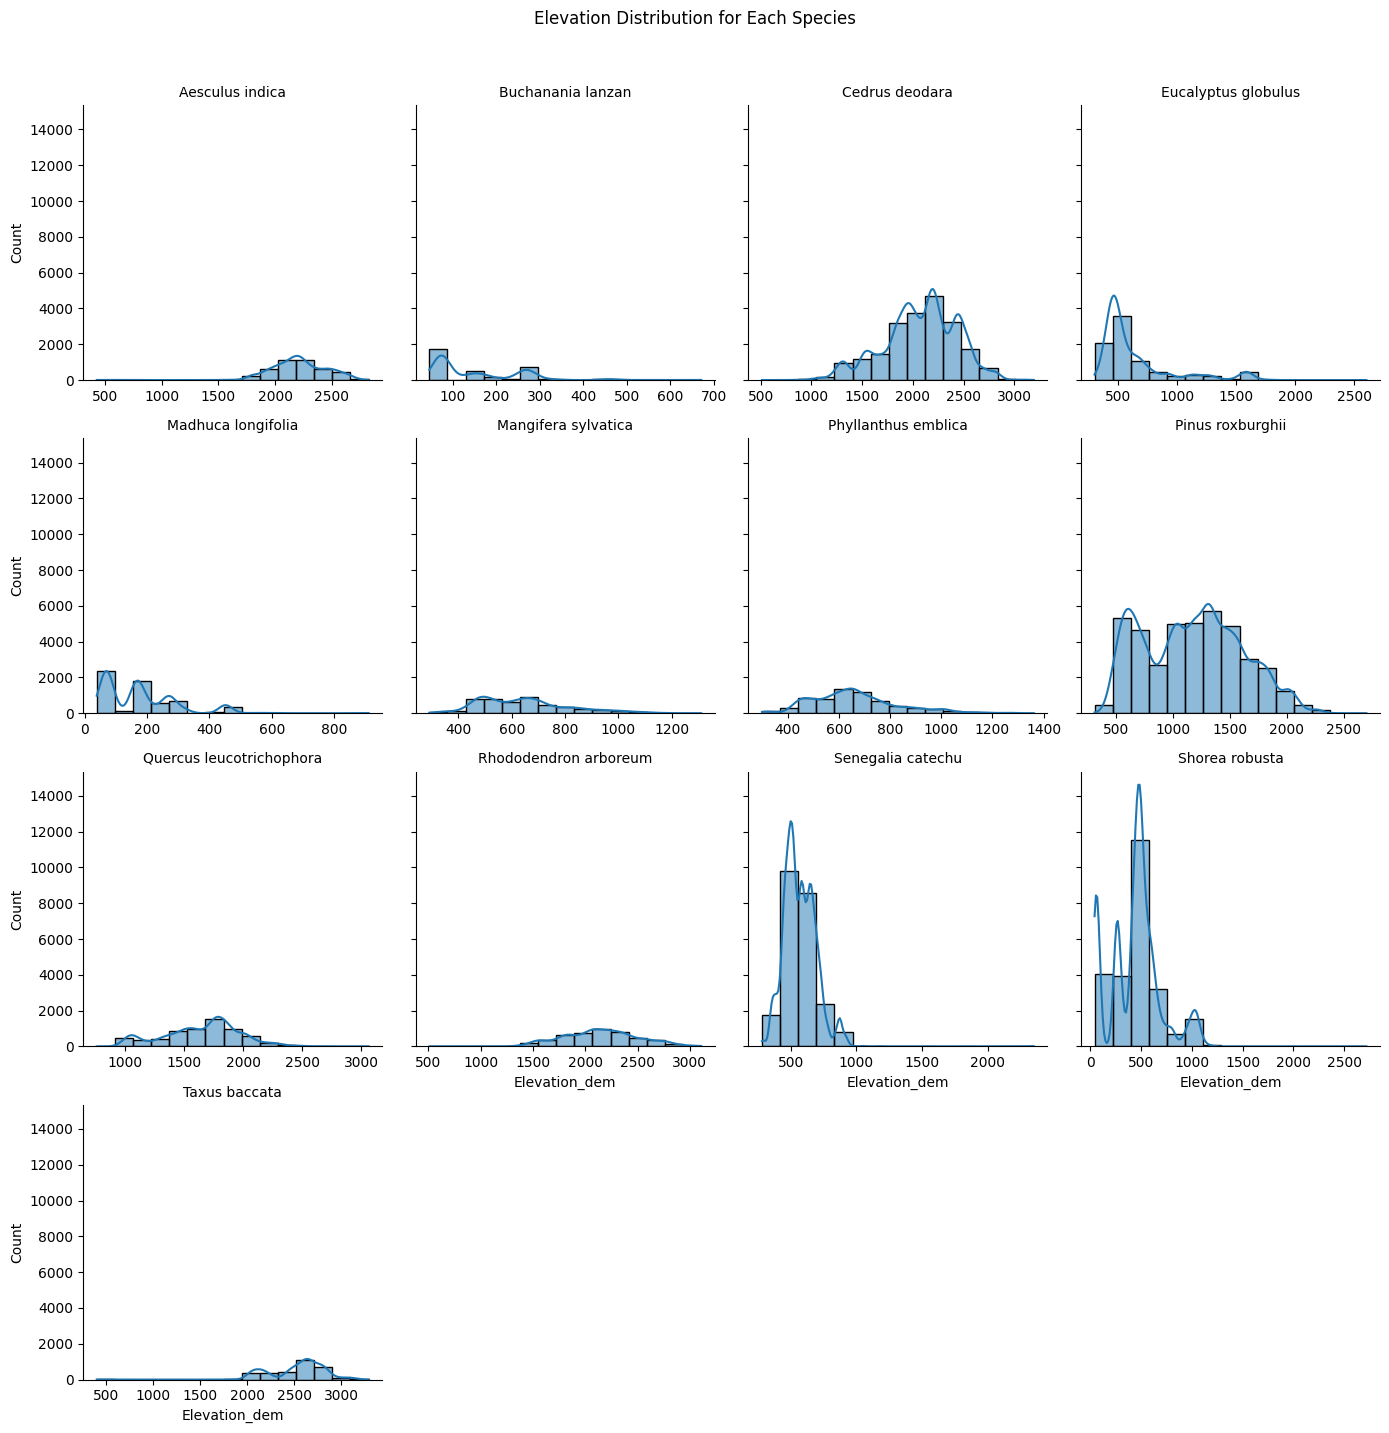

In [12]:
g = sns.FacetGrid(file, col="species_na", col_wrap=4, height=3.5, sharex=False)
g.map_dataframe(sns.histplot, x="Elevation_dem", bins=15, kde=True)
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Elevation Distribution for Each Species", y=1.02)
plt.tight_layout()
plt.show()


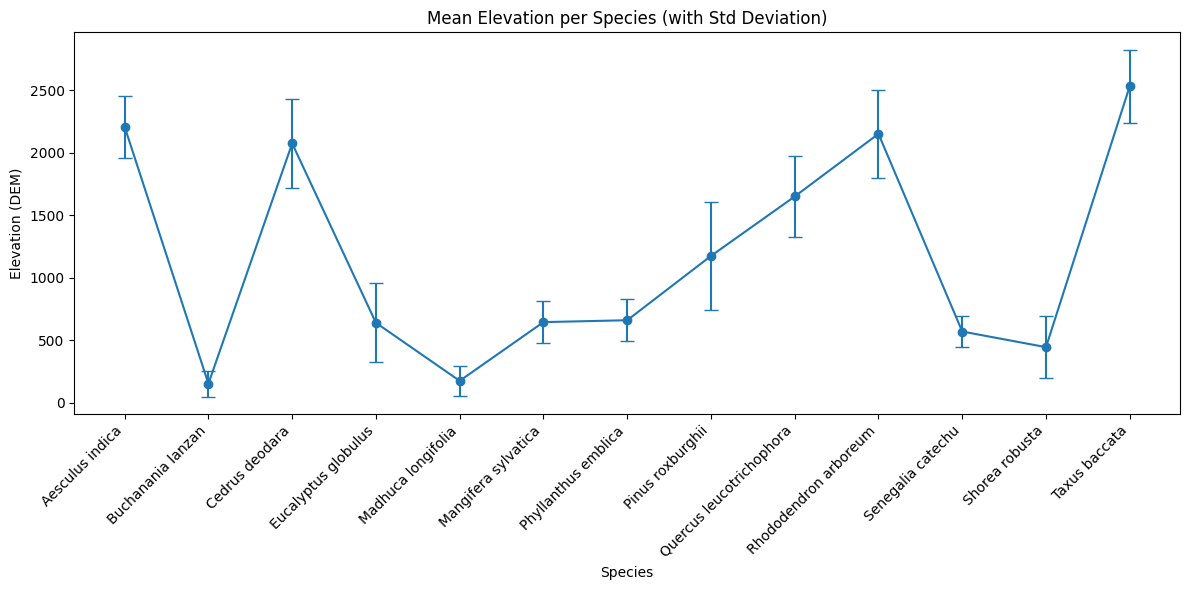

In [13]:
grouped = file.groupby('species_na')['Elevation_dem']
mean_elevation = grouped.mean()
std_elevation = grouped.std()

plt.figure(figsize=(12, 6))
plt.errorbar(mean_elevation.index, mean_elevation.values, yerr=std_elevation.values, fmt='o-', capsize=5)
plt.xticks(rotation=45, ha='right')
plt.title('Mean Elevation per Species (with Std Deviation)')
plt.xlabel('Species')
plt.ylabel('Elevation (DEM)')
plt.tight_layout()
plt.show()
